## 获取数据

In [2]:
from selenium import webdriver
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException,StaleElementReferenceException
from matplotlib import style
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
import requests

print(plt.style.available)
%matplotlib inline

driver=webdriver.Edge()

url='https://esf.fang.com/house-a015277-b02315/'
driver.get(url)



['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
try:
    next_page=driver.find_element('class name','nextp')
    next_page.click()
except NoSuchElementException:
    print("NoSuchElementException")

In [ ]:

table =driver.find_element('class name','shop_list_4')
table.text

In [ ]:
final_final=[]
driver.get("https://esf.fang.com/house-a015277-b02315/")
i=0
while i<21:
    table =driver.find_element('class name','shop_list_4')
    rows = table.find_elements(By.TAG_NAME, 'dl')
    #df
    data = []

    for row in rows:
        # 定位当前行内的所有h4元素
        h4_elements = row.find_elements(By.TAG_NAME, 'h4')
        # 遍历每个h4元素，提取其下的span
        for h4 in h4_elements:
            spans = h4.find_elements(By.TAG_NAME, 'span')
            if spans:
                row_data = [span.text for span in spans]
                data.append(row_data)

    # 创建DataFrame
    df = pd.DataFrame(data)
    df['title']=df[0]
    df['double_check']=df[1]
    df.drop(columns=[0,1,2], inplace=True)
    #df3
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        text_elements = row.find_elements(By.CSS_SELECTOR,'dl[data-bg*="houseid"] dd p.tel_shop' )
        # 遍历每个h4元素，提取其下的span
        if text_elements:
                row_data = [span.text for span in text_elements]
                data.append(row_data)
    # 创建DataFrame
    df3 = pd.DataFrame(data)
    split_df = df3[0].str.split('|', expand=True)
    # 重命名新列
    split_df.columns = [f'extra_{i+1}' for i in range(split_df.shape[1])]
    # 合并到原DataFrame
    df3 = pd.concat([df3, split_df], axis=1)
    df3.drop(columns=[0], inplace=True)
    #删除除数字以外的字符
    df3["s_esf"] = df3['extra_2'].str.replace(r'[^\d.]', '', regex=True)
    df3["shi_ting"]=df3["extra_1"]
    df3["high/low_place"]=df3["extra_3"]
    df3["direction"]=df3["extra_4"]
    df3["when"]=df3["extra_5"]
    # 步骤2：转换为浮点数（无效数据转为NaN）
    df3['s_esf'] = pd.to_numeric(df3['s_esf'], errors='coerce')
    df3.drop(columns=['extra_1','extra_2','extra_3','extra_4','extra_5','extra_6'], inplace=True)

    #df4
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        place_elements = row.find_elements(By.CSS_SELECTOR,'dl[data-bg*="houseid"] dd p.add_shop a' )
        # 遍历每个h4元素，提取其下的span
        if place_elements:
                row_data = [span.text for span in place_elements]
                data.append(row_data)
    df4 = pd.DataFrame(data)
    df4["community"]=df4[0]
    df4.drop(columns=[0], inplace=True)
    #df5
    data=[]
    for row in rows:
        placed_elements = row.find_elements(By.CSS_SELECTOR,'dl[data-bg*="houseid"] dd p.add_shop span' )
        # 遍历每个h4元素，提取其下的span
        if placed_elements:
                row_data = [span.text for span in placed_elements]
                data.append(row_data)

    # 创建DataFrame
    df5 = pd.DataFrame(data)
    df5["location"]=df5[0]
    df5.drop(columns=[0], inplace=True)
    #df6
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        orig_elements = row.find_elements(By.CSS_SELECTOR,'dl[data-bg*="houseid"] dd.price_right span' )
        # 遍历每个h4元素，提取其下的span
        if orig_elements:
                row_data = [span.text for span in orig_elements]
                data.append(row_data)
    df6 = pd.DataFrame(data)
    #删除除数字以外的字符
    df6[0] = df6[0].str.replace(r'[^\d.]', '', regex=True)
    df6[1] = df6[1].str.replace(r'[^\d.]', '', regex=True)

    df6[0] = pd.to_numeric(df6[0], errors='coerce')
    df6[1] = pd.to_numeric(df6[1], errors='coerce')
    df6["price_sum"]=df6[0]
    df6["ori_P/S"]=df6[1]
    df6.drop(columns=[0,1], inplace=True)
    #integration
    final=pd.concat([df,df3, df4,df5,df6], axis=1)
    final_final.append(final)
    #nexe_page
    # 当前页数据抓取...
    try:
        # 定位下一页按钮
        next_btn = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located(
                (By.XPATH, '//p[@class="last"]/a[contains(text(),"下一页")]')
            )
        )
        # 模拟点击
        next_btn.click()
        i+=1
    except Exception as e:
        print("翻页失败:", str(e))
        break




In [ ]:
final_final=pd.concat(final_final)
final_final.to_excel("final_purchase.xlsx")

In [ ]:
from selenium import webdriver
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException,StaleElementReferenceException
from matplotlib import style
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
import requests

print(plt.style.available)
%matplotlib inline

driver=webdriver.Edge()

url='https://zu.fang.com/house-a015277-b02315/'
driver.get(url)

In [ ]:
try:
    next_page=driver.find_element('class name','nextp')
    next_page.click()
except NoSuchElementException:
    print("NoSuchElementException")

In [ ]:
table =driver.find_element('class name','houseList')
table.text

In [ ]:
final_final=[]
driver.get("https://zu.fang.com/house-a015277-b02315/")
i=0
while i<21:
    table =driver.find_element('class name','houseList')
    rows = table.find_elements(By.TAG_NAME, 'dl')
    #df
    data=[]
    for row in rows:
        # 定位当前行内的所有h4元素
        place_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel dd.info.rel p.title' )
        # 遍历每个h4元素，提取其下的span
        if place_elements:
                row_data = [span.text for span in place_elements]
                data.append(row_data)
    df = pd.DataFrame(data)
    df["title"]=df[0]
    df.drop(columns=[0], inplace=True)

    #df3
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        text_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel  dd.info.rel p.font15.mt12.bold' )
        # 遍历每个h4元素，提取其下的span
        if text_elements:
                row_data = [span.text for span in text_elements]
                data.append(row_data)
    # 创建DataFrame
    df3 = pd.DataFrame(data)
    split_df = df3[0].str.split('|', expand=True)
    # 重命名新列
    split_df.columns = [f'extra_{i+1}' for i in range(split_df.shape[1])]
    # 合并到原DataFrame
    df3 = pd.concat([df3, split_df], axis=1)
    df3.drop(columns=[0], inplace=True)

    #删除除数字以外的字符
    df3["s_rent"] = df3['extra_3'].str.replace(r'[^\d.]', '', regex=True)
    df3["rent_type"]=df3["extra_1"]
    df3["rent_condition"]=df3["extra_2"]
    df3["direction"]=df3["extra_4"]
    # 步骤2：转换为浮点数（无效数据转为NaN）
    df3['s_rent'] = pd.to_numeric(df3['s_rent'], errors='coerce')
    df3.drop(columns=['extra_1','extra_2','extra_3','extra_4'], inplace=True)

    #df4
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        place_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel  dd.info.rel p.gray6.mt12 a' )
        # 遍历每个h4元素，提取其下的span
        if place_elements:
                row_data = [span.text for span in place_elements]
                data.append(row_data)
    df4 = pd.DataFrame(data)
    df4["community"]=df4[1]
    df4.drop(columns=[0], inplace=True)
    df4.drop(columns=[1], inplace=True)

    #df5
    data=[]
    for row in rows:
        placed_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel  dd.info.rel div span.note.subInfor' )
        # 遍历每个h4元素，提取其下的span
        if placed_elements:
                row_data = [span.text for span in placed_elements]
                data.append(row_data)

    # 创建DataFrame
    df5 = pd.DataFrame(data)
    df5["description"]=df5[0]
    df5.drop(columns=[0], inplace=True)

    #df6
    data=[]
    for row in rows:
        placed_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel  dd.info.rel div.moreInfo span.price' )
        # 遍历每个h4元素，提取其下的span
        if placed_elements:
                row_data = [span.text for span in placed_elements]
                data.append(row_data)

    # 创建DataFrame
    df6 = pd.DataFrame(data)
    df6["rent"]=df6[0]
    df6.drop(columns=[0], inplace=True)
    df6['rent'] = pd.to_numeric(df6['rent'], errors='coerce')
    #integration
    final=pd.concat([df,df3, df4,df5,df6], axis=1)
    final_final.append(final)
    #nexe_page
    # 当前页数据抓取...
    try:
        # 定位下一页按钮
        next_btn = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located(
                (By.XPATH, '//div[@class="fanye"]/a[contains(text(),"下一页")]')
            )
        )
        # 模拟点击
        next_btn.click()
        i+=1
    except Exception as e:
        print("翻页失败:", str(e))
        break




In [ ]:
final_final=pd.concat(final_final)
final_final.to_excel("final_rent.xlsx")

In [ ]:
from selenium import webdriver
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException,StaleElementReferenceException
from matplotlib import style
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
import requests

print(plt.style.available)
%matplotlib inline

driver=webdriver.Edge()

url='https://zu.fang.com/house-a015277-b02314/'
driver.get(url)

table =driver.find_element('class name','houseList')

final_final=[]
driver.get("https://zu.fang.com/house-a015277-b02314/")
i=0
while i<21:
    table =driver.find_element('class name','houseList')
    rows = table.find_elements(By.TAG_NAME, 'dl')
    #df
    data=[]
    for row in rows:
        # 定位当前行内的所有h4元素
        place_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel dd.info.rel p.title' )
        # 遍历每个h4元素，提取其下的span
        if place_elements:
                row_data = [span.text for span in place_elements]
                data.append(row_data)
    df = pd.DataFrame(data)
    df["title"]=df[0]
    df.drop(columns=[0], inplace=True)

    #df3
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        text_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel  dd.info.rel p.font15.mt12.bold' )
        # 遍历每个h4元素，提取其下的span
        if text_elements:
                row_data = [span.text for span in text_elements]
                data.append(row_data)
    # 创建DataFrame
    df3 = pd.DataFrame(data)
    split_df = df3[0].str.split('|', expand=True)
    # 重命名新列
    split_df.columns = [f'extra_{i+1}' for i in range(split_df.shape[1])]
    # 合并到原DataFrame
    df3 = pd.concat([df3, split_df], axis=1)
    df3.drop(columns=[0], inplace=True)

    #删除除数字以外的字符
    df3["s_rent"] = df3['extra_3'].str.replace(r'[^\d.]', '', regex=True)
    df3["rent_type"]=df3["extra_1"]
    df3["rent_condition"]=df3["extra_2"]
    df3["direction"]=df3["extra_4"]
    # 步骤2：转换为浮点数（无效数据转为NaN）
    df3['s_rent'] = pd.to_numeric(df3['s_rent'], errors='coerce')
    df3.drop(columns=['extra_1','extra_2','extra_3','extra_4'], inplace=True)

    #df4
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        place_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel  dd.info.rel p.gray6.mt12 a' )
        # 遍历每个h4元素，提取其下的span
        if place_elements:
                row_data = [span.text for span in place_elements]
                data.append(row_data)
    df4 = pd.DataFrame(data)
    df4["community"]=df4[1]
    df4.drop(columns=[0], inplace=True)
    df4.drop(columns=[1], inplace=True)

    #df5
    data=[]
    for row in rows:
        placed_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel  dd.info.rel div span.note.subInfor' )
        # 遍历每个h4元素，提取其下的span
        if placed_elements:
                row_data = [span.text for span in placed_elements]
                data.append(row_data)

    # 创建DataFrame
    df5 = pd.DataFrame(data)
    df5["description"]=df5[0]
    df5.drop(columns=[0], inplace=True)

    #df6
    data=[]
    for row in rows:
        placed_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel  dd.info.rel div.moreInfo span.price' )
        # 遍历每个h4元素，提取其下的span
        if placed_elements:
                row_data = [span.text for span in placed_elements]
                data.append(row_data)

    # 创建DataFrame
    df6 = pd.DataFrame(data)
    df6["rent"]=df6[0]
    df6.drop(columns=[0], inplace=True)
    df6['rent'] = pd.to_numeric(df6['rent'], errors='coerce')
    #integration
    final=pd.concat([df,df3, df4,df5,df6], axis=1)
    final_final.append(final)
    #nexe_page
    # 当前页数据抓取...
    try:
        # 定位下一页按钮
        next_btn = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located(
                (By.XPATH, '//div[@class="fanye"]/a[contains(text(),"下一页")]')
            )
        )
        # 模拟点击
        next_btn.click()
        i+=1
    except Exception as e:
        print("翻页失败:", str(e))
        break

final_final=pd.concat(final_final)
final_final.to_excel("final_rent_XZQ.xlsx")


In [5]:
from selenium import webdriver
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException,StaleElementReferenceException
from matplotlib import style
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
import requests

print(plt.style.available)
%matplotlib inline

driver=webdriver.Edge()

url='https://esf.fang.com/house-a015277-b02314/'
driver.get(url)

table =driver.find_element('class name','shop_list_4')

final_final=[]
driver.get("https://esf.fang.com/house-a015277-b02314/")
i=0
while i<21:
    table =driver.find_element('class name','shop_list_4')
    rows = table.find_elements(By.TAG_NAME, 'dl')
    #df
    data = []

    for row in rows:
        # 定位当前行内的所有h4元素
        h4_elements = row.find_elements(By.TAG_NAME, 'h4')
        # 遍历每个h4元素，提取其下的span
        for h4 in h4_elements:
            spans = h4.find_elements(By.TAG_NAME, 'span')
            if spans:
                row_data = [span.text for span in spans]
                data.append(row_data)

    # 创建DataFrame
    df = pd.DataFrame(data)
    df['title']=df[0]
    df['double_check']=df[1]
    df.drop(columns=[0,1,2], inplace=True)
    #df3
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        text_elements = row.find_elements(By.CSS_SELECTOR,'dl[data-bg*="houseid"] dd p.tel_shop' )
        # 遍历每个h4元素，提取其下的span
        if text_elements:
                row_data = [span.text for span in text_elements]
                data.append(row_data)
    # 创建DataFrame
    df3 = pd.DataFrame(data)
    split_df = df3[0].str.split('|', expand=True)
    # 重命名新列
    split_df.columns = [f'extra_{i+1}' for i in range(split_df.shape[1])]
    # 合并到原DataFrame
    df3 = pd.concat([df3, split_df], axis=1)
    df3.drop(columns=[0], inplace=True)
    #删除除数字以外的字符
    df3["s_esf"] = df3['extra_2'].str.replace(r'[^\d.]', '', regex=True)
    df3["shi_ting"]=df3["extra_1"]
    df3["high/low_place"]=df3["extra_3"]
    df3["direction"]=df3["extra_4"]
    df3["when"]=df3["extra_5"]
    # 步骤2：转换为浮点数（无效数据转为NaN）
    df3['s_esf'] = pd.to_numeric(df3['s_esf'], errors='coerce')
    df3.drop(columns=['extra_1','extra_2','extra_3','extra_4','extra_5','extra_6'], inplace=True)

    #df4
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        place_elements = row.find_elements(By.CSS_SELECTOR,'dl[data-bg*="houseid"] dd p.add_shop a' )
        # 遍历每个h4元素，提取其下的span
        if place_elements:
                row_data = [span.text for span in place_elements]
                data.append(row_data)
    df4 = pd.DataFrame(data)
    df4["community"]=df4[0]
    df4.drop(columns=[0], inplace=True)
    #df5
    data=[]
    for row in rows:
        placed_elements = row.find_elements(By.CSS_SELECTOR,'dl[data-bg*="houseid"] dd p.add_shop span' )
        # 遍历每个h4元素，提取其下的span
        if placed_elements:
                row_data = [span.text for span in placed_elements]
                data.append(row_data)

    # 创建DataFrame
    df5 = pd.DataFrame(data)
    df5["location"]=df5[0]
    df5.drop(columns=[0], inplace=True)
    #df6
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        orig_elements = row.find_elements(By.CSS_SELECTOR,'dl[data-bg*="houseid"] dd.price_right span' )
        # 遍历每个h4元素，提取其下的span
        if orig_elements:
                row_data = [span.text for span in orig_elements]
                data.append(row_data)
    df6 = pd.DataFrame(data)
    #删除除数字以外的字符
    df6[0] = df6[0].str.replace(r'[^\d.]', '', regex=True)
    df6[1] = df6[1].str.replace(r'[^\d.]', '', regex=True)

    df6[0] = pd.to_numeric(df6[0], errors='coerce')
    df6[1] = pd.to_numeric(df6[1], errors='coerce')
    df6["price_sum"]=df6[0]
    df6["ori_P/S"]=df6[1]
    df6.drop(columns=[0,1], inplace=True)
    #integration
    final=pd.concat([df,df3, df4,df5,df6], axis=1)
    final_final.append(final)
    #nexe_page
    # 当前页数据抓取...
    try:
        # 定位下一页按钮
        next_btn = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located(
                (By.XPATH, '//p[@class="last"]/a[contains(text(),"下一页")]')
            )
        )
        # 模拟点击
        next_btn.click()
        i+=1
    except Exception as e:
        print("翻页失败:", str(e))
        break

final_final=pd.concat(final_final)
final_final.to_excel("final_purchase_XZQ.xlsx")


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
翻页失败: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF76FCBA785+20677]
	simdutf::get_active_implementation [0x00007FF76FC16F30+492592]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF76FF0DC3A+1807418]
	(No symbol) [0x00007FF76FA572AC]
	(No symbol) [0x00007FF76FA5758B]
	(No symbol) [0x00007FF76FA985A7]
	(No symbol) [0x00007FF76FA7849F]
	(No symbol) [0x00007FF76FA4D6ED]
	(No symbol) [0x00007FF76FA95D

## 西三旗block的 median price to rent ratio

In [4]:
price_2=pd.read_excel("final_purchase_XZQ.xlsx")
rent_2=pd.read_excel("final_rent_XZQ.xlsx")
median_rent=rent_2['rent'].median()
median_price=price_2['price_sum'].median()
PtR2=median_price*10000/(12*median_rent)
print(PtR2)

130.55555555555554


In [7]:
from selenium import webdriver
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException,StaleElementReferenceException
from matplotlib import style
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
import requests

print(plt.style.available)
%matplotlib inline

driver=webdriver.Edge()

url='https://zu.fang.com/house-a015277-b07195/'
driver.get(url)

table =driver.find_element('class name','houseList')

final_final=[]
driver.get("https://zu.fang.com/house-a015277-b07195/")
i=0
while i<21:
    table =driver.find_element('class name','houseList')
    rows = table.find_elements(By.TAG_NAME, 'dl')
    #df
    data=[]
    for row in rows:
        # 定位当前行内的所有h4元素
        place_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel dd.info.rel p.title' )
        # 遍历每个h4元素，提取其下的span
        if place_elements:
                row_data = [span.text for span in place_elements]
                data.append(row_data)
    df = pd.DataFrame(data)
    df["title"]=df[0]
    df.drop(columns=[0], inplace=True)

    #df3
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        text_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel  dd.info.rel p.font15.mt12.bold' )
        # 遍历每个h4元素，提取其下的span
        if text_elements:
                row_data = [span.text for span in text_elements]
                data.append(row_data)
    # 创建DataFrame
    df3 = pd.DataFrame(data)
    split_df = df3[0].str.split('|', expand=True)
    # 重命名新列
    split_df.columns = [f'extra_{i+1}' for i in range(split_df.shape[1])]
    # 合并到原DataFrame
    df3 = pd.concat([df3, split_df], axis=1)
    df3.drop(columns=[0], inplace=True)

    #删除除数字以外的字符
    df3["s_rent"] = df3['extra_3'].str.replace(r'[^\d.]', '', regex=True)
    df3["rent_type"]=df3["extra_1"]
    df3["rent_condition"]=df3["extra_2"]
    df3["direction"]=df3["extra_4"]
    # 步骤2：转换为浮点数（无效数据转为NaN）
    df3['s_rent'] = pd.to_numeric(df3['s_rent'], errors='coerce')
    df3.drop(columns=['extra_1','extra_2','extra_3','extra_4'], inplace=True)

    #df4
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        place_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel  dd.info.rel p.gray6.mt12 a' )
        # 遍历每个h4元素，提取其下的span
        if place_elements:
                row_data = [span.text for span in place_elements]
                data.append(row_data)
    df4 = pd.DataFrame(data)
    df4["community"]=df4[1]
    df4.drop(columns=[0], inplace=True)
    df4.drop(columns=[1], inplace=True)

    #df5
    data=[]
    for row in rows:
        placed_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel  dd.info.rel div span.note.subInfor' )
        # 遍历每个h4元素，提取其下的span
        if placed_elements:
                row_data = [span.text for span in placed_elements]
                data.append(row_data)

    # 创建DataFrame
    df5 = pd.DataFrame(data)
    df5["description"]=df5[0]
    df5.drop(columns=[0], inplace=True)

    #df6
    data=[]
    for row in rows:
        placed_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel  dd.info.rel div.moreInfo span.price' )
        # 遍历每个h4元素，提取其下的span
        if placed_elements:
                row_data = [span.text for span in placed_elements]
                data.append(row_data)

    # 创建DataFrame
    df6 = pd.DataFrame(data)
    df6["rent"]=df6[0]
    df6.drop(columns=[0], inplace=True)
    df6['rent'] = pd.to_numeric(df6['rent'], errors='coerce')
    #integration
    final=pd.concat([df,df3, df4,df5,df6], axis=1)
    final_final.append(final)
    #nexe_page
    # 当前页数据抓取...
    try:
        # 定位下一页按钮
        next_btn = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located(
                (By.XPATH, '//div[@class="fanye"]/a[contains(text(),"下一页")]')
            )
        )
        # 模拟点击
        next_btn.click()
        i+=1
    except Exception as e:
        print("翻页失败:", str(e))
        break

final_final=pd.concat(final_final)
final_final.to_excel("final_rent_XEQ.xlsx")


from selenium import webdriver
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException,StaleElementReferenceException
from matplotlib import style
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
import requests

print(plt.style.available)
%matplotlib inline

driver=webdriver.Edge()

url='https://esf.fang.com/house-a015277-b07195/'
driver.get(url)

table =driver.find_element('class name','shop_list_4')

final_final=[]
driver.get("https://esf.fang.com/house-a015277-b07195/")
i=0
while i<21:
    table =driver.find_element('class name','shop_list_4')
    rows = table.find_elements(By.TAG_NAME, 'dl')
    #df
    data = []

    for row in rows:
        # 定位当前行内的所有h4元素
        h4_elements = row.find_elements(By.TAG_NAME, 'h4')
        # 遍历每个h4元素，提取其下的span
        for h4 in h4_elements:
            spans = h4.find_elements(By.TAG_NAME, 'span')
            if spans:
                row_data = [span.text for span in spans]
                data.append(row_data)

    # 创建DataFrame
    df = pd.DataFrame(data)
    df['title']=df[0]
    df['double_check']=df[1]
    df.drop(columns=[0,1,2], inplace=True)
    #df3
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        text_elements = row.find_elements(By.CSS_SELECTOR,'dl[data-bg*="houseid"] dd p.tel_shop' )
        # 遍历每个h4元素，提取其下的span
        if text_elements:
                row_data = [span.text for span in text_elements]
                data.append(row_data)
    # 创建DataFrame
    df3 = pd.DataFrame(data)
    split_df = df3[0].str.split('|', expand=True)
    # 重命名新列
    split_df.columns = [f'extra_{i+1}' for i in range(split_df.shape[1])]
    # 合并到原DataFrame
    df3 = pd.concat([df3, split_df], axis=1)
    df3.drop(columns=[0], inplace=True)
    #删除除数字以外的字符
    df3["s_esf"] = df3['extra_2'].str.replace(r'[^\d.]', '', regex=True)
    df3["shi_ting"]=df3["extra_1"]
    df3["high/low_place"]=df3["extra_3"]
    df3["direction"]=df3["extra_4"]
    df3["when"]=df3["extra_5"]
    # 步骤2：转换为浮点数（无效数据转为NaN）
    df3['s_esf'] = pd.to_numeric(df3['s_esf'], errors='coerce')
    df3.drop(columns=['extra_1','extra_2','extra_3','extra_4','extra_5','extra_6'], inplace=True)

    #df4
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        place_elements = row.find_elements(By.CSS_SELECTOR,'dl[data-bg*="houseid"] dd p.add_shop a' )
        # 遍历每个h4元素，提取其下的span
        if place_elements:
                row_data = [span.text for span in place_elements]
                data.append(row_data)
    df4 = pd.DataFrame(data)
    df4["community"]=df4[0]
    df4.drop(columns=[0], inplace=True)
    #df5
    data=[]
    for row in rows:
        placed_elements = row.find_elements(By.CSS_SELECTOR,'dl[data-bg*="houseid"] dd p.add_shop span' )
        # 遍历每个h4元素，提取其下的span
        if placed_elements:
                row_data = [span.text for span in placed_elements]
                data.append(row_data)

    # 创建DataFrame
    df5 = pd.DataFrame(data)
    df5["location"]=df5[0]
    df5.drop(columns=[0], inplace=True)
    #df6
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        orig_elements = row.find_elements(By.CSS_SELECTOR,'dl[data-bg*="houseid"] dd.price_right span' )
        # 遍历每个h4元素，提取其下的span
        if orig_elements:
                row_data = [span.text for span in orig_elements]
                data.append(row_data)
    df6 = pd.DataFrame(data)
    #删除除数字以外的字符
    df6[0] = df6[0].str.replace(r'[^\d.]', '', regex=True)
    df6[1] = df6[1].str.replace(r'[^\d.]', '', regex=True)

    df6[0] = pd.to_numeric(df6[0], errors='coerce')
    df6[1] = pd.to_numeric(df6[1], errors='coerce')
    df6["price_sum"]=df6[0]
    df6["ori_P/S"]=df6[1]
    df6.drop(columns=[0,1], inplace=True)
    #integration
    final=pd.concat([df,df3, df4,df5,df6], axis=1)
    final_final.append(final)
    #nexe_page
    # 当前页数据抓取...
    try:
        # 定位下一页按钮
        next_btn = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located(
                (By.XPATH, '//p[@class="last"]/a[contains(text(),"下一页")]')
            )
        )
        # 模拟点击
        next_btn.click()
        i+=1
    except Exception as e:
        print("翻页失败:", str(e))
        break

final_final=pd.concat(final_final)
final_final.to_excel("final_purchase_XEQ.xlsx")


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
翻页失败: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF76FCBA785+20677]
	simdutf::get_active_implementation [0x00007FF76FC16F30+492592]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF76FF0DC3A+1807418]
	(No symbol) [0x00007FF76FA572AC]
	(No symbol) [0x00007FF76FA5758B]
	(No symbol) [0x00007FF76FA985A7]
	(No symbol) [0x00007FF76FA7849F]
	(No symbol) [0x00007FF76FA4D6ED]
	(No symbol) [0x00007FF76FA95D

## 西二旗block的 median price to rent ratio

In [5]:
price_3=pd.read_excel("final_purchase_XEQ.xlsx")
rent_3=pd.read_excel("final_rent_XEQ.xlsx")
median_rent=rent_3['rent'].median()
median_price=price_3['price_sum'].median()
PtR3=median_price*10000/(12*median_rent)
print(PtR3)

144.35695538057743


In [9]:
from selenium import webdriver
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException,StaleElementReferenceException
from matplotlib import style
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
import requests

print(plt.style.available)
%matplotlib inline

driver=webdriver.Edge()

url='https://zu.fang.com/house-a015277-b022/'
driver.get(url)

table =driver.find_element('class name','houseList')

final_final=[]
driver.get("https://zu.fang.com/house-a015277-b022/")
i=0
while i<21:
    table =driver.find_element('class name','houseList')
    rows = table.find_elements(By.TAG_NAME, 'dl')
    #df
    data=[]
    for row in rows:
        # 定位当前行内的所有h4元素
        place_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel dd.info.rel p.title' )
        # 遍历每个h4元素，提取其下的span
        if place_elements:
                row_data = [span.text for span in place_elements]
                data.append(row_data)
    df = pd.DataFrame(data)
    df["title"]=df[0]
    df.drop(columns=[0], inplace=True)

    #df3
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        text_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel  dd.info.rel p.font15.mt12.bold' )
        # 遍历每个h4元素，提取其下的span
        if text_elements:
                row_data = [span.text for span in text_elements]
                data.append(row_data)
    # 创建DataFrame
    df3 = pd.DataFrame(data)
    split_df = df3[0].str.split('|', expand=True)
    # 重命名新列
    split_df.columns = [f'extra_{i+1}' for i in range(split_df.shape[1])]
    # 合并到原DataFrame
    df3 = pd.concat([df3, split_df], axis=1)
    df3.drop(columns=[0], inplace=True)

    #删除除数字以外的字符
    df3["s_rent"] = df3['extra_3'].str.replace(r'[^\d.]', '', regex=True)
    df3["rent_type"]=df3["extra_1"]
    df3["rent_condition"]=df3["extra_2"]
    df3["direction"]=df3["extra_4"]
    # 步骤2：转换为浮点数（无效数据转为NaN）
    df3['s_rent'] = pd.to_numeric(df3['s_rent'], errors='coerce')
    df3.drop(columns=['extra_1','extra_2','extra_3','extra_4'], inplace=True)

    #df4
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        place_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel  dd.info.rel p.gray6.mt12 a' )
        # 遍历每个h4元素，提取其下的span
        if place_elements:
                row_data = [span.text for span in place_elements]
                data.append(row_data)
    df4 = pd.DataFrame(data)
    df4["community"]=df4[1]
    df4.drop(columns=[0], inplace=True)
    df4.drop(columns=[1], inplace=True)

    #df5
    data=[]
    for row in rows:
        placed_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel  dd.info.rel div span.note.subInfor' )
        # 遍历每个h4元素，提取其下的span
        if placed_elements:
                row_data = [span.text for span in placed_elements]
                data.append(row_data)

    # 创建DataFrame
    df5 = pd.DataFrame(data)
    df5["description"]=df5[0]
    df5.drop(columns=[0], inplace=True)

    #df6
    data=[]
    for row in rows:
        placed_elements = row.find_elements(By.CSS_SELECTOR,'dl.list.hiddenMap.rel  dd.info.rel div.moreInfo span.price' )
        # 遍历每个h4元素，提取其下的span
        if placed_elements:
                row_data = [span.text for span in placed_elements]
                data.append(row_data)

    # 创建DataFrame
    df6 = pd.DataFrame(data)
    df6["rent"]=df6[0]
    df6.drop(columns=[0], inplace=True)
    df6['rent'] = pd.to_numeric(df6['rent'], errors='coerce')
    #integration
    final=pd.concat([df,df3, df4,df5,df6], axis=1)
    final_final.append(final)
    #nexe_page
    # 当前页数据抓取...
    try:
        # 定位下一页按钮
        next_btn = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located(
                (By.XPATH, '//div[@class="fanye"]/a[contains(text(),"下一页")]')
            )
        )
        # 模拟点击
        next_btn.click()
        i+=1
    except Exception as e:
        print("翻页失败:", str(e))
        break

final_final=pd.concat(final_final)
final_final.to_excel("final_rent_SD.xlsx")


from selenium import webdriver
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException,StaleElementReferenceException
from matplotlib import style
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
import requests

print(plt.style.available)
%matplotlib inline

driver=webdriver.Edge()

url='https://esf.fang.com/house-a015277-b022/'
driver.get(url)

table =driver.find_element('class name','shop_list_4')

final_final=[]
driver.get("https://esf.fang.com/house-a015277-b022/")
i=0
while i<21:
    table =driver.find_element('class name','shop_list_4')
    rows = table.find_elements(By.TAG_NAME, 'dl')
    #df
    data = []

    for row in rows:
        # 定位当前行内的所有h4元素
        h4_elements = row.find_elements(By.TAG_NAME, 'h4')
        # 遍历每个h4元素，提取其下的span
        for h4 in h4_elements:
            spans = h4.find_elements(By.TAG_NAME, 'span')
            if spans:
                row_data = [span.text for span in spans]
                data.append(row_data)

    # 创建DataFrame
    df = pd.DataFrame(data)
    df['title']=df[0]
    df['double_check']=df[1]
    df.drop(columns=[0,1,2], inplace=True)
    #df3
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        text_elements = row.find_elements(By.CSS_SELECTOR,'dl[data-bg*="houseid"] dd p.tel_shop' )
        # 遍历每个h4元素，提取其下的span
        if text_elements:
                row_data = [span.text for span in text_elements]
                data.append(row_data)
    # 创建DataFrame
    df3 = pd.DataFrame(data)
    split_df = df3[0].str.split('|', expand=True)
    # 重命名新列
    split_df.columns = [f'extra_{i+1}' for i in range(split_df.shape[1])]
    # 合并到原DataFrame
    df3 = pd.concat([df3, split_df], axis=1)
    df3.drop(columns=[0], inplace=True)
    #删除除数字以外的字符
    df3["s_esf"] = df3['extra_2'].str.replace(r'[^\d.]', '', regex=True)
    df3["shi_ting"]=df3["extra_1"]
    df3["high/low_place"]=df3["extra_3"]
    df3["direction"]=df3["extra_4"]
    df3["when"]=df3["extra_5"]
    # 步骤2：转换为浮点数（无效数据转为NaN）
    df3['s_esf'] = pd.to_numeric(df3['s_esf'], errors='coerce')
    df3.drop(columns=['extra_1','extra_2','extra_3','extra_4','extra_5','extra_6'], inplace=True)

    #df4
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        place_elements = row.find_elements(By.CSS_SELECTOR,'dl[data-bg*="houseid"] dd p.add_shop a' )
        # 遍历每个h4元素，提取其下的span
        if place_elements:
                row_data = [span.text for span in place_elements]
                data.append(row_data)
    df4 = pd.DataFrame(data)
    df4["community"]=df4[0]
    df4.drop(columns=[0], inplace=True)
    #df5
    data=[]
    for row in rows:
        placed_elements = row.find_elements(By.CSS_SELECTOR,'dl[data-bg*="houseid"] dd p.add_shop span' )
        # 遍历每个h4元素，提取其下的span
        if placed_elements:
                row_data = [span.text for span in placed_elements]
                data.append(row_data)

    # 创建DataFrame
    df5 = pd.DataFrame(data)
    df5["location"]=df5[0]
    df5.drop(columns=[0], inplace=True)
    #df6
    data = []
    for row in rows:
        # 定位当前行内的所有h4元素
        orig_elements = row.find_elements(By.CSS_SELECTOR,'dl[data-bg*="houseid"] dd.price_right span' )
        # 遍历每个h4元素，提取其下的span
        if orig_elements:
                row_data = [span.text for span in orig_elements]
                data.append(row_data)
    df6 = pd.DataFrame(data)
    #删除除数字以外的字符
    df6[0] = df6[0].str.replace(r'[^\d.]', '', regex=True)
    df6[1] = df6[1].str.replace(r'[^\d.]', '', regex=True)

    df6[0] = pd.to_numeric(df6[0], errors='coerce')
    df6[1] = pd.to_numeric(df6[1], errors='coerce')
    df6["price_sum"]=df6[0]
    df6["ori_P/S"]=df6[1]
    df6.drop(columns=[0,1], inplace=True)
    #integration
    final=pd.concat([df,df3, df4,df5,df6], axis=1)
    final_final.append(final)
    #nexe_page
    # 当前页数据抓取...
    try:
        # 定位下一页按钮
        next_btn = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located(
                (By.XPATH, '//p[@class="last"]/a[contains(text(),"下一页")]')
            )
        )
        # 模拟点击
        next_btn.click()
        i+=1
    except Exception as e:
        print("翻页失败:", str(e))
        break

final_final=pd.concat(final_final)
final_final.to_excel("final_purchase_SD.xlsx")


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
翻页失败: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF76FCBA785+20677]
	simdutf::get_active_implementation [0x00007FF76FC16F30+492592]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF76FF0DC3A+1807418]
	(No symbol) [0x00007FF76FA572AC]
	(No symbol) [0x00007FF76FA5758B]
	(No symbol) [0x00007FF76FA985A7]
	(No symbol) [0x00007FF76FA7849F]
	(No symbol) [0x00007FF76FA4D6ED]
	(No symbol) [0x00007FF76FA95D

## 上地block的 median price to rent ratio

In [8]:
price_4=pd.read_excel("final_purchase_SD.xlsx")
rent_4=pd.read_excel("final_rent_SD.xlsx")
median_rent=rent_4['rent'].median()
median_price=price_4['price_sum'].median()
PtR4=median_price*10000/(12*median_rent)
print(PtR4)

153.01724137931035


## 清河block的 median price to rent ratio

In [9]:
price_1=pd.read_excel("final_purchase.xlsx")
rent_1=pd.read_excel("final_rent.xlsx")
mdeian_rent=rent_1['rent'].median()
median_price=price_1['price_sum'].median()
PtR1=median_price*10000/(12*mdeian_rent)
print(PtR1)

202.92397660818713


In [10]:
rent_1['block']=int(1)
rent_2['block']=int(2)
rent_3['block']=int(3)
rent_4['block']=int(4)

## 有关四个block的FigureA

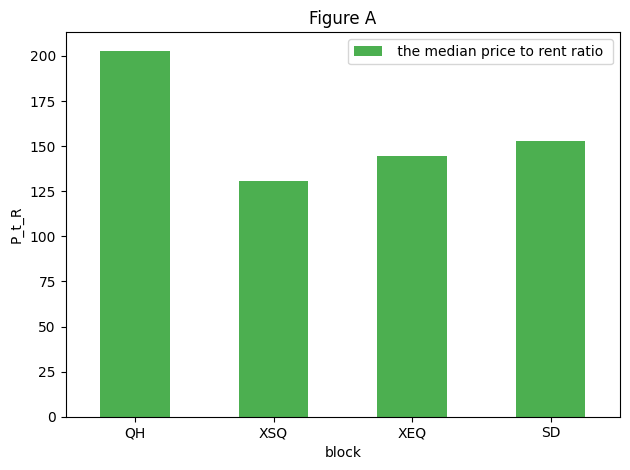

In [22]:
PtR = {'Category': ['QH', 'XSQ', 'XEQ', 'SD'],
        ' the median price to rent ratio ': [PtR1,PtR2,PtR3,PtR4]}
PtR=pd.DataFrame(PtR)
PtR.plot(kind='bar', x='Category', y=' the median price to rent ratio ', color='#4CAF50')

plt.title('Figure A')
plt.xlabel('block')
plt.ylabel('P_t_R')

plt.xticks(rotation=0) #旋转X轴字的方向
plt.tight_layout()  # 自动调整布局
plt.show()

## 整合四个block的数据，并对街区类别进行独热编码

In [11]:
combine_rent=pd.concat([rent_1, rent_2, rent_3,rent_4], axis=0, ignore_index=False)
combine_rent.to_excel("combine_rent.xlsx")
combine_rent = pd.get_dummies(combine_rent, columns=['block'], prefix='block')


## 计算每平米月租金，构造两个model的变量

In [13]:
combine_rent['rent/s']=combine_rent['rent']/combine_rent['s_rent']
combine_rent['block_1*s']=combine_rent['block_1']*combine_rent['s_rent']
combine_rent['block_2*s']=combine_rent['block_2']*combine_rent['s_rent']
combine_rent['block_3*s']=combine_rent['block_3']*combine_rent['s_rent']
combine_rent['block_4*s']=combine_rent['block_4']*combine_rent['s_rent']
combine_rent.head()

,Unnamed: 0,title,s_rent,rent_type,rent_condition,direction,community,description,rent,block_1,block_2,block_3,block_4,rent/s,block_1*s,block_2*s,block_3*s,block_4*s
0,0,清河小营桥电力宿舍南向精装次卧室出租,15,合租次卧,3户合租,朝南,电力宿舍,距昌平线清河小营桥站约601米。,1800,True,False,False,False,120.000000,15,0,0,0
1,1,整租 · 清河 · 永泰东里 · 2室1厅,57,整租,2室1厅,朝南北,永泰东里,距8号线永泰庄站约592米。,6100,True,False,False,False,107.017544,57,0,0,0
2,2,相寓 清河·海清园·高楼层·3居室·次卧1,15,合租单间,3户合租,朝南,海清园,距昌平线清河小营桥站约255米。,2800,True,False,False,False,186.666667,15,0,0,0
3,3,整租 · 清河 · 永泰西里 · 2室1厅,58,整租,2室1厅,朝南北,永泰西里,距8号线永泰庄站约516米。,6000,True,False,False,False,103.448276,58,0,0,0
4,4,相寓 清河·世华龙樾一期西区·高楼层·2居室,78,整租,2室1厅,朝南北,世华龙樾一期,距8号线西小口站约216米。,7500,True,False,False,False,96.153846,78,0,0,0


In [14]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
X_train=combine_rent[['s_rent','block_1','block_2','block_3','block_4','block_1*s','block_2*s','block_3*s','block_4*s']]
Y_train=combine_rent['rent/s']
linreg.fit(X_train, Y_train)



LinearRegression()

## 对m2不同取值进行预测

In [15]:
X_Rent=[]
for m2 in [50,100]:
    for i in range(4):
        X_pre=[[m2,0,0,0,0,0,0,0,0]]
        X_pre[0][1+i]=1
        X_pre[0][5+i]=X_pre[0][1+i]*m2
        column=['s_rent','block_1','block_2','block_3','block_4','block_1*s','block_2*s','block_3*s','block_4*s']
        X_pre=pd.DataFrame(X_pre,columns=column)
        y_pred = linreg.predict(X_pre)
        X_Rent.append(float(y_pred[0])*m2)
print(X_Rent)

[8352.865501140861, 5206.855185954509, 6133.5310777111135, 6163.39531705664, 25983.359808673635, 10315.765378147149, 11570.372891125073, 10558.57958062988]


## 同上处理二手房市场的数据，block分类，独热编码，构造model

In [16]:
price_1['block']=int(1)
price_2['block']=int(2)
price_3['block']=int(3)
price_4['block']=int(4)
combine_price=pd.concat([price_1, price_2, price_3,price_4], axis=0, ignore_index=False)
combine_price.to_excel("combine_price.xlsx")
combine_price = pd.get_dummies(combine_price, columns=['block'], prefix='block')


In [17]:
combine_price['price/s']=(10000*combine_price['price_sum'])/combine_price['s_esf']
combine_price['block_1*s']=combine_price['block_1']*combine_price['s_esf']
combine_price['block_2*s']=combine_price['block_2']*combine_price['s_esf']
combine_price['block_3*s']=combine_price['block_3']*combine_price['s_esf']
combine_price['block_4*s']=combine_price['block_4']*combine_price['s_esf']
combine_price.head()

,Unnamed: 0,title,double_check,s_esf,shi_ting,high/low_place,direction,when,community,location,...,ori_P/S,block_1,block_2,block_3,block_4,price/s,block_1*s,block_2*s,block_3*s,block_4*s
0,0,"海淀现房无中阶费,楼层可选,學院路平层大三居,房源有限尽快",NaN,180.00,3室2厅,高层 （共26层）,南北向,2022年建,强佑府学上院,清河-八达岭高速清河桥西南角,...,80555,True,False,False,False,80555.555556,180.00,0.0,0.0,0.0
1,1,总监推荐 万橡府中间排 前后花园 诚意出售 价格可谈,双重验真,185.05,3室2厅,高层 （共16层）,南北向,2014年建,华润橡树湾,清河-清河中街与学附树中街交汇处西行140米路北,...,126992,True,False,False,False,126992.704674,185.05,0.0,0.0,0.0
2,2,"(豪装下跃,中间位置)功能区明确,使用空间大,别墅体验",双重验真,553.91,4室3厅,底层 （共4层）,南北向,2019年建,世华龙樾四期,清河-清河小营桥东700米,...,72195,True,False,False,False,72195.844090,553.91,0.0,0.0,0.0
3,3,四期华润精装 保持如新 看房随时 诚意出售 采光无遮挡,双重验真,139.00,3室2厅,低层 （共29层）,南向,2014年建,华润橡树湾,清河-清河中街与学附树中街交汇处西行140米路北,...,115107,True,False,False,False,115107.913669,139.00,0.0,0.0,0.0
4,4,"新上,老客户房源,橡树湾二期双卫三居可做四居,随时可看",双重验真,143.66,3室1厅,中层 （共18层）,南北向,2010年建,华润橡树湾,清河-清河中街与学附树中街交汇处西行140米路北,...,102324,True,False,False,False,102324.933872,143.66,0.0,0.0,0.0


In [18]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
X_train=combine_price[['s_esf','block_1','block_2','block_3','block_4','block_1*s','block_2*s','block_3*s','block_4*s']]
Y_train=combine_price['price/s']
linreg.fit(X_train, Y_train)
#单位是元/平米

LinearRegression()

## 同理预测二手房的m2下的价格

In [19]:
X_price=[]
for m2 in [50,100]:
    for i in range(4):
        X_pre=[[m2,0,0,0,0,0,0,0,0]]
        X_pre[0][1+i]=1
        X_pre[0][5+i]=X_pre[0][1+i]*m2
        column=['s_esf','block_1','block_2','block_3','block_4','block_1*s','block_2*s','block_3*s','block_4*s']
        X_pre=pd.DataFrame(X_pre,columns=column)
        y_pred = linreg.predict(X_pre)
        X_price.append(float(y_pred[0])*m2)
print(X_price)

[6048272.8235784685, 57201048.146594144, 102705987.15539964, 6031010.43970933, 11710278.026013378, 58319804.831347674, 118256456.42682311, 10738684.562920615]


## 计算 the price to rent ratio for each block， 为FigureB 和C做准备

In [20]:
PTR_final=[]
for i in range(0,len(X_price)):
    PTR_pre=X_price[i]/(X_Rent[i]*12)
    PTR_final.append(PTR_pre)
print(PTR_final)

[60.341296675897, 915.4765865343244, 1395.4167924659673, 81.54339896359632, 37.55697913408511, 471.12197280494553, 851.7188508068052, 84.75480753917842]


## Figure B

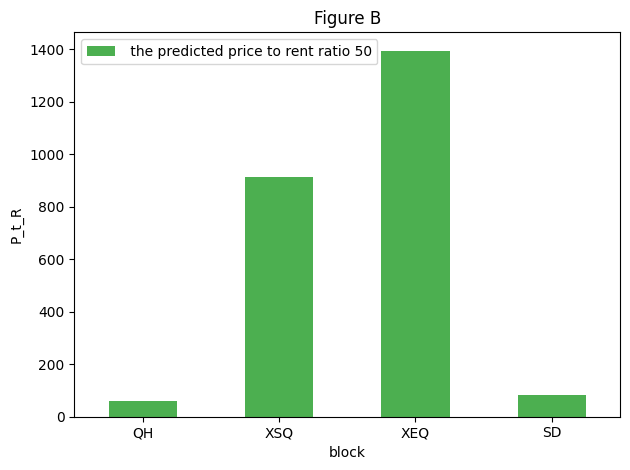

In [128]:
PTR_final_50 = {'Category': ['QH', 'XSQ', 'XEQ', 'SD'],
        ' the predicted price to rent ratio 50': PTR_final[0:4]}
PTR_final_50=pd.DataFrame(PTR_final_50)
PTR_final_50.plot(kind='bar', x='Category', y=' the predicted price to rent ratio 50', color='#4CAF50')

plt.title('Figure B')
plt.xlabel('block')
plt.ylabel('P_t_R')

plt.xticks(rotation=0) #旋转X轴字的方向
plt.tight_layout()  # 自动调整布局
plt.show()

## Figure C

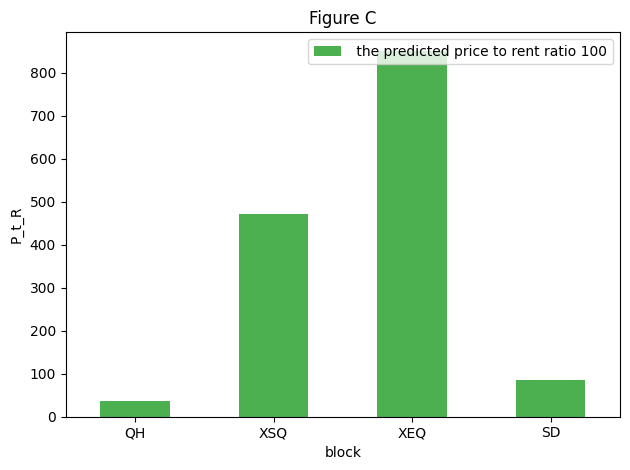

In [127]:
PTR_final_100 = {'Category': ['QH', 'XSQ', 'XEQ', 'SD'],
        ' the predicted price to rent ratio 100': PTR_final[4:8]}
PTR_final_100=pd.DataFrame(PTR_final_100)
PTR_final_100.plot(kind='bar', x='Category', y=' the predicted price to rent ratio 100', color='#4CAF50')

plt.title('Figure C')
plt.xlabel('block')
plt.ylabel('P_t_R')

plt.xticks(rotation=0) #旋转X轴字的方向
plt.tight_layout()  # 自动调整布局
plt.show()